In [31]:
import pandas as pd  #importing pandas libraries
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:
#2020_year_goals
# read the excel
import pandas as pd 
Data_Goals= pd.read_excel("2020_year_goals.xlsx", sheet_name="Goals")
Data_Goals 

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...
...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...


In [33]:
import nltk
import ssl
import os
import re
!pip install textblob
import pandas as pd
from nltk import sent_tokenize, word_tokenize, WordNetLemmatizer
from textblob import TextBlob #for spelling correction
from nltk.util import ngrams
from collections import Counter
#import ignore_words
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
Data_Goals= pd.read_excel("2020_year_goals.xlsx", sheet_name="Goals")
Data_Goals 



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\vishn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\vishn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...
...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...


In [34]:
#for ignore_words
from sklearn.feature_extraction.text import CountVectorizer

# read the excel
Data_Goals= pd.read_excel("2020_year_goals.xlsx", sheet_name="Goals")
Data_Goals 

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...
...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...


In [35]:
#to check for empty columns
Data_Goals.isnull().sum()

Responder_ID          0
Quarter_Work          0
College               0
Major                 0
Cops                  0
Class                 0
Citizenship_Status    0
Co-op                 0
Co-op_Goals           4
dtype: int64

In [36]:
Data_Goals= Data_Goals.dropna()
#check again for results
Data_Goals.isnull().sum()

Responder_ID          0
Quarter_Work          0
College               0
Major                 0
Cops                  0
Class                 0
Citizenship_Status    0
Co-op                 0
Co-op_Goals           0
dtype: int64

In [37]:
# Assuming Data_Goals is your DataFrame
Data_Goals = Data_Goals.copy()

# Convert 'Co-op_Goals' to lowercase and assign it to 'My_Goals'
Data_Goals['My_Goals'] = Data_Goals['Co-op_Goals'].astype(str).str.lower()
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...,i wanted to get more hands on experience in ta...
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...,ever since i began pursuing a career in accoun...
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...,this co-op wasn't as beneficial as my first co...
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...,i learned how to troubleshoot amazon's network...
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...,an aspect of this co-op experience that relate...
...,...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...,this was my very first experience working at a...
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...,i have always cared about making sure there ar...
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...,one of my professional goals is to become a cp...
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...,coming into my co-op i wasn't sure what i want...


In [38]:
#remove contractions

!pip install contractions




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\vishn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
import contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))
contractions.contractions_dict.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

In [40]:
Def_Con = contractions.contractions_dict
def update_text(text):
    for key in Def_Con:
        text = re.sub(key, Def_Con[key], text)
    return text

In [41]:
def expand_contractions(text,contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [42]:
Data_Goals['My_Goals'] = Data_Goals['Co-op_Goals'].apply(lambda x: update_text(x))
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...,I wanted to get more hands on experience in ta...
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...,Ever since I began pursuing a career in accoun...
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...,This co-op was not as beneficial as my first c...
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...,I learned how to troubleshoot Amazon's network...
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...,An aspect of this co-op experience that relate...
...,...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...,This was my very first experience working at a...
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...,I have always cared about making sure there ar...
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...,One of my professional goals is to become a CP...
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...,Coming into my co-op I was not sure what I wan...


In [43]:
#remove other special characters
Data_Goals['My_Goals']=Data_Goals['My_Goals'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x)))
Data_Goals['My_Goals']

0       I wanted to get more hands on experience in ta...
1       Ever since I began pursuing a career in accoun...
2       This co op was not as beneficial as my first c...
3       I learned how to troubleshoot Amazon s network...
4       An aspect of this co op experience that relate...
                              ...                        
1378    This was my very first experience working at a...
1379    I have always cared about making sure there ar...
1380    One of my professional goals is to become a CP...
1381    Coming into my co op I was not sure what I wan...
1382    I definitely feel like the experience of being...
Name: My_Goals, Length: 1379, dtype: object

In [44]:
#removing all digits from the data
Data_Goals['My_Goals']=Data_Goals['My_Goals'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))
Data_Goals['My_Goals']


0       I wanted to get more hands on experience in ta...
1       Ever since I began pursuing a career in accoun...
2       This co op was not as beneficial as my first c...
3       I learned how to troubleshoot Amazon s network...
4       An aspect of this co op experience that relate...
                              ...                        
1378    This was my very first experience working at a...
1379    I have always cared about making sure there ar...
1380    One of my professional goals is to become a CP...
1381    Coming into my co op I was not sure what I wan...
1382    I definitely feel like the experience of being...
Name: My_Goals, Length: 1379, dtype: object

In [45]:
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...,I wanted to get more hands on experience in ta...
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...,Ever since I began pursuing a career in accoun...
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...,This co op was not as beneficial as my first c...
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...,I learned how to troubleshoot Amazon s network...
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...,An aspect of this co op experience that relate...
...,...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...,This was my very first experience working at a...
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...,I have always cared about making sure there ar...
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...,One of my professional goals is to become a CP...
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...,Coming into my co op I was not sure what I wan...


In [46]:
import string  #removing punctuation marks
for character in string.punctuation:
    Data_Goals['My_Goals']=Data_Goals['My_Goals'].replace(character, '')
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...,I wanted to get more hands on experience in ta...
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...,Ever since I began pursuing a career in accoun...
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...,This co op was not as beneficial as my first c...
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...,I learned how to troubleshoot Amazon s network...
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...,An aspect of this co op experience that relate...
...,...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...,This was my very first experience working at a...
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...,I have always cared about making sure there ar...
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...,One of my professional goals is to become a CP...
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...,Coming into my co op I was not sure what I wan...


In [47]:
import nltk
nltk.download('punkt')
#Generate token based on white space
Data_Goals['My_Goals']= Data_Goals['My_Goals'].apply(word_tokenize)
Data_Goals

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...,"[I, wanted, to, get, more, hands, on, experien..."
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...,"[Ever, since, I, began, pursuing, a, career, i..."
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...,"[This, co, op, was, not, as, beneficial, as, m..."
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...,"[I, learned, how, to, troubleshoot, Amazon, s,..."
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...,"[An, aspect, of, this, co, op, experience, tha..."
...,...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...,"[This, was, my, very, first, experience, worki..."
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...,"[I, have, always, cared, about, making, sure, ..."
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...,"[One, of, my, professional, goals, is, to, bec..."
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...,"[Coming, into, my, co, op, I, was, not, sure, ..."


In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import openpyxl

# Download NLTK stopwords if not already downloaded
nltk.download("stopwords")
nltk.download("punkt")

# Load the Excel file
input_excel_path = "C:\\Users\\vishn\\Desktop\\VISHNU\\MIS Project\\2020_year_goals.xlsx"  # Replace with your input file path
output_excel_path = "C:\\Users\\vishn\\Desktop\\VISHNU\\MIS Project\\AY_2020_Goals_output.xlsx"  # Replace with your output file path
sheet_name = 'Goals'
# Read the Excel data into a DataFrame
df = pd.read_excel(input_excel_path, sheet_name=sheet_name, engine='openpyxl')

# Define text mining functions
def text_mining(text):
    if isinstance(text, str):  # Check if the input is a string
        # Tokenization
        words = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words("english"))
        filtered_words = [word for word in words if word.lower() not in stop_words]
        # Stemming
        # ps = PorterStemmer()
        # stemmed_words = [ps.stem(word) for word in filtered_words]
        return " ".join(filtered_words) 
    else:
        return ""  # Return an empty string for non-string values

# Apply text mining to the desired column
column_name = "Co-op_Goals"  # Replace with your column name
df[column_name] = df[column_name].apply(text_mining)

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)
print("Text mining and Excel sheet creation completed.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text mining and Excel sheet creation completed.


In [48]:
#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

Data_Goals

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...,"[I, wanted, to, get, more, hands, on, experien..."
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...,"[Ever, since, I, began, pursuing, a, career, i..."
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...,"[This, co, op, was, not, as, beneficial, as, m..."
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...,"[I, learned, how, to, troubleshoot, Amazon, s,..."
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...,"[An, aspect, of, this, co, op, experience, tha..."
...,...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...,"[This, was, my, very, first, experience, worki..."
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...,"[I, have, always, cared, about, making, sure, ..."
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...,"[One, of, my, professional, goals, is, to, bec..."
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...,"[Coming, into, my, co, op, I, was, not, sure, ..."


In [53]:
# Generate own list of words to be ignored
my_ignore_words_Goals = ['I','This','An','Ever','Like','like','since','get','one','opened','ask','long','skills','academic','made','realize','also','gave','one','relates','comfort','one','full','would' ,'role', 'give', 'coop', 'drexel', 'through', 'n t', 'enjoy', 'may', 'felt','always','order', 'put','day','various', 'try', 'graduate','others','definitely', 'path', 'mostly','well','task','good','although','allow','still','organization','even','go','personal','goal','able','learn','part','person','thing','consider','job','knowledge','data','first','major','hope','think','coop','find','another','manager','client','look','grow','complete','want','work','area','graduation','choose','best','goal','mine','whether','everything','although','continue','job','new','aspect','co','overall','hope','gain','believe','life','interest','idea','great','information','withinend','operation','specific','side','program','value','sport','understand','say','one op','tax','bring','worker','lead','much','never','relate','sucessful','op','come','research','way','skill','help','student','especially','within','learnlot','present','present','work','bas','level','multiple','relate','month','end','position','possible','run','nand','take','place','year','oppurtunity','connection','job','love','product','start','come','within','way','taugustt','feel','insight','study','large','insight','set','gain','speak','aspect','use','apply','meet','make','really','career','though','think','gain','pursue','thing','last','different','good','world','see','firm','environment','confidence','change','internship','something','allow','start','employee','last','sport','whole','big','relate','go','important','become','find','people','leave','marchet','think','though','experience relate','valuable','prepare','aspect','course','sale','push','truly','field','job','expose','school','see','throughout','task','back','ability','see','account','everyone','understand','truly','leave','big','relate','use','look','team','complete','happy','support','many','different','make','sure','achieve','industry','lot','amount','throughout','group','allow','account','position','happy','next','manage','hard','high','enjoy','one goal','expose','two','many kind','bos','set','exposure','good','show','helpful','class','enjoy','department','focus','previous','know','come','enjoy','class','member','give','understand','call','event','job','glad','aspect','go','plan','complete','along','provide','build','show','real','comfortable','real','come','class','create','see','take','start','experience','help','workplace','ops','would,like','interview','task','complete','big','prepare','chance','extremely','remote','set']
my_ignore_words_Goals

['I',
 'This',
 'An',
 'Ever',
 'Like',
 'like',
 'since',
 'get',
 'one',
 'opened',
 'ask',
 'long',
 'skills',
 'academic',
 'made',
 'realize',
 'also',
 'gave',
 'one',
 'relates',
 'comfort',
 'one',
 'full',
 'would',
 'role',
 'give',
 'coop',
 'drexel',
 'through',
 'n t',
 'enjoy',
 'may',
 'felt',
 'always',
 'order',
 'put',
 'day',
 'various',
 'try',
 'graduate',
 'others',
 'definitely',
 'path',
 'mostly',
 'well',
 'task',
 'good',
 'although',
 'allow',
 'still',
 'organization',
 'even',
 'go',
 'personal',
 'goal',
 'able',
 'learn',
 'part',
 'person',
 'thing',
 'consider',
 'job',
 'knowledge',
 'data',
 'first',
 'major',
 'hope',
 'think',
 'coop',
 'find',
 'another',
 'manager',
 'client',
 'look',
 'grow',
 'complete',
 'want',
 'work',
 'area',
 'graduation',
 'choose',
 'best',
 'goal',
 'mine',
 'whether',
 'everything',
 'although',
 'continue',
 'job',
 'new',
 'aspect',
 'co',
 'overall',
 'hope',
 'gain',
 'believe',
 'life',
 'interest',
 'idea',
 'g

In [54]:
Data_Goals['My_Goals']= Data_Goals['My_Goals'].apply(lambda x: [item for item in x if item not in stopwords])
Data_Goals['My_Goals']= Data_Goals['My_Goals'].apply(lambda x: [item for item in x if item not in my_ignore_words_Goals])
Data_Goals['My_Goals']

0       [wanted, hands, return, preparation, planning,...
1       [began, pursuing, accounting, main, attain, Bi...
2       [beneficial, Johnson, Johnson, due, However, c...
3       [learned, troubleshoot, Amazon, network, manag...
4       [professional, Drexel, networking, opportuniti...
                              ...                        
1378    [working, professional, learned, professional,...
1379    [cared, making, opportunities, poor, minoritie...
1380    [One, professional, goals, CPA, graduating, Dr...
1381    [Coming, wanted, future, Whether, accounting, ...
1382    [office, regards, carrying, professional, saw,...
Name: My_Goals, Length: 1379, dtype: object

In [55]:
#concatenating the words in the last column into a string
Data_Goals['My_Goals']= Data_Goals['My_Goals'].apply(lambda x: ' '.join([item for item in x]))
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,I wanted to get more hands on experience in ta...,wanted hands return preparation planning allow...
1,72,Fall/Winter,B,ACCT,5COP,SR,Domestic,Third/Final,Ever since I began pursuing a career in accoun...,began pursuing accounting main attain Big Four...
2,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,This co-op wasn't as beneficial as my first co...,beneficial Johnson Johnson due However collabo...
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...,learned troubleshoot Amazon network managing n...
4,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,An aspect of this co-op experience that relate...,professional Drexel networking opportunities e...
...,...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...,working professional learned professional task...
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...,cared making opportunities poor minorities One...
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...,One professional goals CPA graduating Drexel h...
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...,Coming wanted future Whether accounting financ...


In [56]:
#joing the words in rows in a single string
Goal_words = ' '.join([word for word in Data_Goals['My_Goals']])
Goal_words

'wanted hands return preparation planning allowed seniors partners explaining things future wanted could working time began pursuing accounting main attain Big Four At seemed reach thought reach opportunity knew thought could keep head Before BDO Big Four considered discouraging time The could time BDO could impression time prove BDO takes profession meant smaller Six months went learned knew time came second decemberded shot Big Four One led EY decemberded milestone four years earlier The could keep head could let fate handle rest After ended EY extended time offer lesson beneficial Johnson Johnson due However collaborate remotely colleagues globally locally approach assignments ideas ways solve My either enter consulting project management roles using Salesforce Agile project management method boosted opportunities pursuing time roles learned troubleshoot Amazon network managing network vulnerabilities professional getting cybersecurity understanding basics network works essential pr

In [57]:
# Tokenize the string Goals_all_words
Goal_string_tokens= word_tokenize(Goal_words)

# Remove non alpha words
Goal_string_tokens = [word for word in Goal_string_tokens if word.isalpha()]

Goal_string_tokens

['wanted',
 'hands',
 'return',
 'preparation',
 'planning',
 'allowed',
 'seniors',
 'partners',
 'explaining',
 'things',
 'future',
 'wanted',
 'could',
 'working',
 'time',
 'began',
 'pursuing',
 'accounting',
 'main',
 'attain',
 'Big',
 'Four',
 'At',
 'seemed',
 'reach',
 'thought',
 'reach',
 'opportunity',
 'knew',
 'thought',
 'could',
 'keep',
 'head',
 'Before',
 'BDO',
 'Big',
 'Four',
 'considered',
 'discouraging',
 'time',
 'The',
 'could',
 'time',
 'BDO',
 'could',
 'impression',
 'time',
 'prove',
 'BDO',
 'takes',
 'profession',
 'meant',
 'smaller',
 'Six',
 'months',
 'went',
 'learned',
 'knew',
 'time',
 'came',
 'second',
 'decemberded',
 'shot',
 'Big',
 'Four',
 'One',
 'led',
 'EY',
 'decemberded',
 'milestone',
 'four',
 'years',
 'earlier',
 'The',
 'could',
 'keep',
 'head',
 'could',
 'let',
 'fate',
 'handle',
 'rest',
 'After',
 'ended',
 'EY',
 'extended',
 'time',
 'offer',
 'lesson',
 'beneficial',
 'Johnson',
 'Johnson',
 'due',
 'However',
 'coll

In [58]:
import re

Goal_string_tokens= re.sub(r'[^a-zA-Z0-9]', ' ',Goal_words)
Goal_string_tokens = Goal_string_tokens.replace('   ' , '')
Goal_string_tokens = Goal_string_tokens.replace('  ' , '')
Goal_string_tokens= Goal_string_tokens.replace('x000dx000d','')
Goal_string_tokens= Goal_string_tokens.replace('x000d','')
Goal_string_tokens= Goal_string_tokens.replace('j p','jp')
Goal_string_tokens= Goal_string_tokens.replace('x x','')
Goal_string_tokens= Goal_string_tokens.replace('marcheting','Marketing')

Goal_string_tokens= Goal_string_tokens.replace('full','')
Goal_string_tokens

# import re

# Goal_string_tokens= re.sub(r'[^a-zA-Z0-9]', ' ',Goal_words)
# Goal_string_tokens = Goal_string_tokens.replace('   ' , '')
# Goal_string_tokens = Goal_string_tokens.replace('  ' , '')
# Goal_string_tokens= Goal_string_tokens.replace('x000dx000d','')
# Goal_string_tokens= Goal_string_tokens.replace('x000d','')
# Goal_string_tokens= Goal_string_tokens.replace('j p','jp')
# Goal_string_tokens= Goal_string_tokens.replace('x x','')
# Goal_string_tokens= Goal_string_tokens.replace('co,op','')
# Goal_string_tokens= Goal_string_tokens.replace('co op','')
# Goal_string_tokens= Goal_string_tokens.replace('marchet','marketing')
# Goal_string_tokens= Goal_string_tokens.replace('x,x','')


# Goal_string_tokens

'wanted hands return preparation planning allowed seniors partners explaining things future wanted could working time began pursuing accounting main attain Big Four At seemed reach thought reach opportunity knew thought could keep head Before BDO Big Four considered discouraging time The could time BDO could impression time prove BDO takes profession meant smaller Six months went learned knew time came second decemberded shot Big Four One led EY decemberded milestone four years earlier The could keep head could let fate handle rest After ended EY extended time offer lesson beneficial Johnson Johnson due However collaborate remotely colleagues globally locally approach assignments ideas ways solve My either enter consulting project management roles using Salesforce Agile project management method boosted opportunities pursuing time roles learned troubleshoot Amazon network managing network vulnerabilities professional getting cybersecurity understanding basics network works essential pr

In [59]:
# Tokenize the string Goals_all_words
Goal_string_tokens = word_tokenize(Goal_string_tokens)

Goal_string_tokens

['wanted',
 'hands',
 'return',
 'preparation',
 'planning',
 'allowed',
 'seniors',
 'partners',
 'explaining',
 'things',
 'future',
 'wanted',
 'could',
 'working',
 'time',
 'began',
 'pursuing',
 'accounting',
 'main',
 'attain',
 'Big',
 'Four',
 'At',
 'seemed',
 'reach',
 'thought',
 'reach',
 'opportunity',
 'knew',
 'thought',
 'could',
 'keep',
 'head',
 'Before',
 'BDO',
 'Big',
 'Four',
 'considered',
 'discouraging',
 'time',
 'The',
 'could',
 'time',
 'BDO',
 'could',
 'impression',
 'time',
 'prove',
 'BDO',
 'takes',
 'profession',
 'meant',
 'smaller',
 'Six',
 'months',
 'went',
 'learned',
 'knew',
 'time',
 'came',
 'second',
 'decemberded',
 'shot',
 'Big',
 'Four',
 'One',
 'led',
 'EY',
 'decemberded',
 'milestone',
 'four',
 'years',
 'earlier',
 'The',
 'could',
 'keep',
 'head',
 'could',
 'let',
 'fate',
 'handle',
 'rest',
 'After',
 'ended',
 'EY',
 'extended',
 'time',
 'offer',
 'lesson',
 'beneficial',
 'Johnson',
 'Johnson',
 'due',
 'However',
 'coll

In [60]:
#Lemmetization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
Goal_string_tokens = [lemma.lemmatize(word, pos = "n") for word in Goal_string_tokens]
Goal_string_tokens = [lemma.lemmatize(word, pos = "a") for word in Goal_string_tokens]
Goal_string_tokens = [lemma.lemmatize(word, pos = "v") for word in Goal_string_tokens]
Goal_string_tokens= [lemma.lemmatize(word, pos = "r") for word in Goal_string_tokens]
Goal_string_tokens= [lemma.lemmatize(word, pos = "s") for word in Goal_string_tokens]



Goal_string_tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['want',
 'hand',
 'return',
 'preparation',
 'plan',
 'allow',
 'senior',
 'partner',
 'explain',
 'thing',
 'future',
 'want',
 'could',
 'work',
 'time',
 'begin',
 'pursue',
 'account',
 'main',
 'attain',
 'Big',
 'Four',
 'At',
 'seem',
 'reach',
 'think',
 'reach',
 'opportunity',
 'know',
 'think',
 'could',
 'keep',
 'head',
 'Before',
 'BDO',
 'Big',
 'Four',
 'consider',
 'discourage',
 'time',
 'The',
 'could',
 'time',
 'BDO',
 'could',
 'impression',
 'time',
 'prove',
 'BDO',
 'take',
 'profession',
 'mean',
 'small',
 'Six',
 'month',
 'go',
 'learn',
 'know',
 'time',
 'come',
 'second',
 'decemberded',
 'shoot',
 'Big',
 'Four',
 'One',
 'lead',
 'EY',
 'decemberded',
 'milestone',
 'four',
 'year',
 'early',
 'The',
 'could',
 'keep',
 'head',
 'could',
 'let',
 'fate',
 'handle',
 'rest',
 'After',
 'end',
 'EY',
 'extend',
 'time',
 'offer',
 'lesson',
 'beneficial',
 'Johnson',
 'Johnson',
 'due',
 'However',
 'collaborate',
 'remotely',
 'colleague',
 'globally',

In [61]:
#creating unigrams
ngrams = zip(*[Goal_string_tokens[i:] for i in range(1)])
one_ngrams=[" ".join(ngram) for ngram in ngrams]
one_ngrams

['want',
 'hand',
 'return',
 'preparation',
 'plan',
 'allow',
 'senior',
 'partner',
 'explain',
 'thing',
 'future',
 'want',
 'could',
 'work',
 'time',
 'begin',
 'pursue',
 'account',
 'main',
 'attain',
 'Big',
 'Four',
 'At',
 'seem',
 'reach',
 'think',
 'reach',
 'opportunity',
 'know',
 'think',
 'could',
 'keep',
 'head',
 'Before',
 'BDO',
 'Big',
 'Four',
 'consider',
 'discourage',
 'time',
 'The',
 'could',
 'time',
 'BDO',
 'could',
 'impression',
 'time',
 'prove',
 'BDO',
 'take',
 'profession',
 'mean',
 'small',
 'Six',
 'month',
 'go',
 'learn',
 'know',
 'time',
 'come',
 'second',
 'decemberded',
 'shoot',
 'Big',
 'Four',
 'One',
 'lead',
 'EY',
 'decemberded',
 'milestone',
 'four',
 'year',
 'early',
 'The',
 'could',
 'keep',
 'head',
 'could',
 'let',
 'fate',
 'handle',
 'rest',
 'After',
 'end',
 'EY',
 'extend',
 'time',
 'offer',
 'lesson',
 'beneficial',
 'Johnson',
 'Johnson',
 'due',
 'However',
 'collaborate',
 'remotely',
 'colleague',
 'globally',

In [62]:
# Counter is a container that will hold the count of each of the elements present in the container
course_string_tokens_count_1 = Counter(one_ngrams)

# Print top 20 most used tokens
course_string_tokens_count_1.most_common(20)

[('work', 868),
 ('company', 732),
 ('learn', 679),
 ('professional', 672),
 ('time', 670),
 ('help', 616),
 ('business', 587),
 ('Drexel', 533),
 ('future', 483),
 ('My', 426),
 ('opportunity', 425),
 ('project', 386),
 ('goal', 371),
 ('want', 368),
 ('The', 362),
 ('get', 360),
 ('Marketing', 357),
 ('allow', 336),
 ('need', 312),
 ('One', 295)]

In [63]:
#creating bigrams
ngrams = zip(*[Goal_string_tokens[i:] for i in range(2)])
two_ngrams=[" ".join(ngram) for ngram in ngrams]
two_ngrams

['want hand',
 'hand return',
 'return preparation',
 'preparation plan',
 'plan allow',
 'allow senior',
 'senior partner',
 'partner explain',
 'explain thing',
 'thing future',
 'future want',
 'want could',
 'could work',
 'work time',
 'time begin',
 'begin pursue',
 'pursue account',
 'account main',
 'main attain',
 'attain Big',
 'Big Four',
 'Four At',
 'At seem',
 'seem reach',
 'reach think',
 'think reach',
 'reach opportunity',
 'opportunity know',
 'know think',
 'think could',
 'could keep',
 'keep head',
 'head Before',
 'Before BDO',
 'BDO Big',
 'Big Four',
 'Four consider',
 'consider discourage',
 'discourage time',
 'time The',
 'The could',
 'could time',
 'time BDO',
 'BDO could',
 'could impression',
 'impression time',
 'time prove',
 'prove BDO',
 'BDO take',
 'take profession',
 'profession mean',
 'mean small',
 'small Six',
 'Six month',
 'month go',
 'go learn',
 'learn know',
 'know time',
 'time come',
 'come second',
 'second decemberded',
 'decemberded

In [64]:
# Counter is a container that will hold the count of each of the elements present in the container
Goal_word_tokens_count_3 = Counter(two_ngrams)

# Print top 20 most used tokens
Goal_word_tokens_count_3.most_common(20)

[('professional goal', 102),
 ('Co Op', 75),
 ('pursue Drexel', 62),
 ('One professional', 55),
 ('One goal', 53),
 ('good understand', 49),
 ('social medium', 49),
 ('In addition', 43),
 ('time Drexel', 43),
 ('project management', 36),
 ('For example', 36),
 ('time management', 36),
 ('problem solve', 33),
 ('supply chain', 33),
 ('professional set', 31),
 ('public speak', 30),
 ('professional pursue', 29),
 ('investment bank', 29),
 ('give opportunity', 29),
 ('A professional', 29)]

In [65]:
nltk.pos_tag(Goal_string_tokens)

[('want', 'JJ'),
 ('hand', 'NN'),
 ('return', 'VB'),
 ('preparation', 'NN'),
 ('plan', 'NN'),
 ('allow', 'VBP'),
 ('senior', 'JJ'),
 ('partner', 'NN'),
 ('explain', 'JJ'),
 ('thing', 'NN'),
 ('future', 'NN'),
 ('want', 'NN'),
 ('could', 'MD'),
 ('work', 'VB'),
 ('time', 'NN'),
 ('begin', 'VB'),
 ('pursue', 'NN'),
 ('account', 'NN'),
 ('main', 'JJ'),
 ('attain', 'RB'),
 ('Big', 'JJ'),
 ('Four', 'CD'),
 ('At', 'IN'),
 ('seem', 'VBP'),
 ('reach', 'JJ'),
 ('think', 'VBP'),
 ('reach', 'VBP'),
 ('opportunity', 'NN'),
 ('know', 'VBP'),
 ('think', 'VB'),
 ('could', 'MD'),
 ('keep', 'VB'),
 ('head', 'NN'),
 ('Before', 'IN'),
 ('BDO', 'NNP'),
 ('Big', 'NNP'),
 ('Four', 'CD'),
 ('consider', 'NN'),
 ('discourage', 'NN'),
 ('time', 'NN'),
 ('The', 'DT'),
 ('could', 'MD'),
 ('time', 'NN'),
 ('BDO', 'NNP'),
 ('could', 'MD'),
 ('impression', 'VB'),
 ('time', 'NN'),
 ('prove', 'VB'),
 ('BDO', 'NNP'),
 ('take', 'VB'),
 ('profession', 'NN'),
 ('mean', 'VB'),
 ('small', 'JJ'),
 ('Six', 'NNP'),
 ('month', 

In [66]:
# Here we will create Words frequency matrix (Two word)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
serve=cv.fit_transform(Data_Goals["My_Goals"])
serve.shape
df_dtm = pd.DataFrame(serve.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=Data_Goals.index
df_dtm.head(5)

,aaron learned,ab amazing,abilities accomplish,abilities analyst,abilities applied,abilities collaborate,abilities connected,abilities done,abilities during,abilities estate,...,zones got,zones taking,zoning issues,zoom calls,zoom having,zoom meeting,zoom meetings,zoom quite,zoom trying,zuleba executive
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
word_freqs_2 = df_dtm.sum(axis=0).sort_values(ascending=False)[:30].to_dict()


word_freqs_2

{'professional goals': 102,
 'co op': 95,
 'pursuing drexel': 61,
 'one professional': 55,
 'one goals': 53,
 'social media': 50,
 'better understanding': 49,
 'supply chain': 47,
 'in addition': 44,
 'time drexel': 43,
 'project management': 41,
 'business analytics': 40,
 'time management': 39,
 'for example': 36,
 'public speaking': 30,
 'investment banking': 29,
 'professional pursuing': 29,
 'professional setting': 29,
 'wealth management': 28,
 'drexel university': 28,
 'problem solving': 27,
 'digital marcheting': 27,
 'in future': 26,
 'it helped': 24,
 'daily basis': 24,
 'goals drexel': 23,
 'six months': 23,
 'given opportunity': 23,
 'during time': 22,
 'private equity': 22}

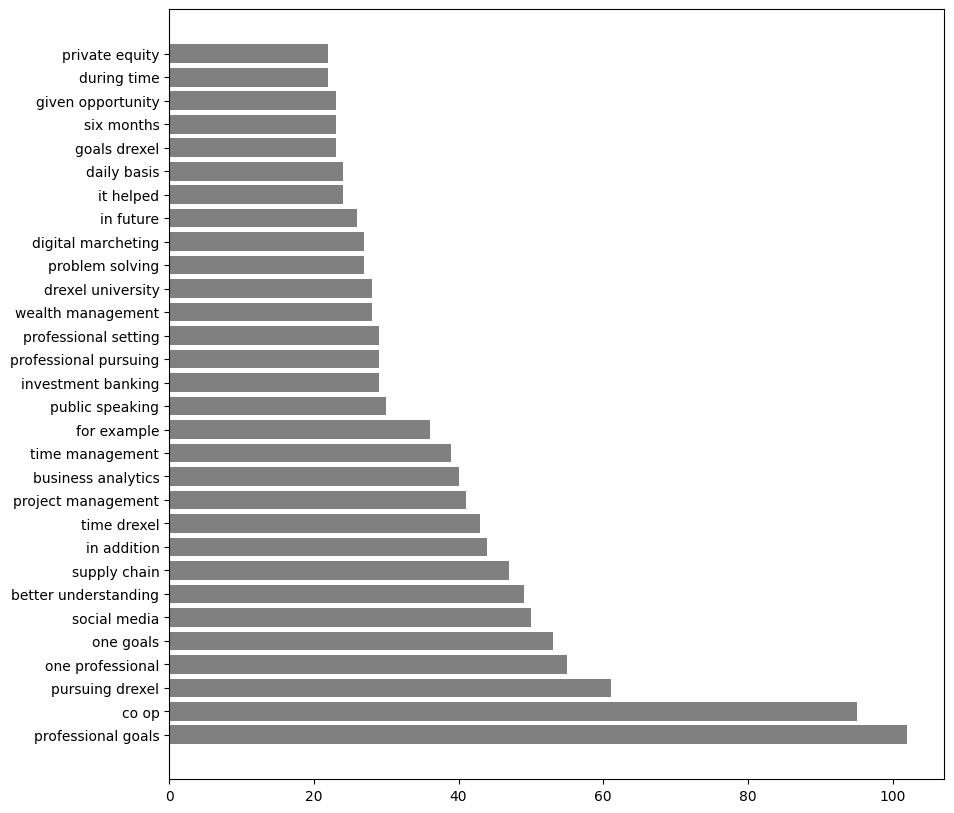

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.barh(range(len(word_freqs_2)), word_freqs_2.values(),color='gray')

plt.yticks(range(len(word_freqs_2)), word_freqs_2.keys())
plt.yticks(rotation = 0)
plt.show()

In [69]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 151.4/151.4 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\vishn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


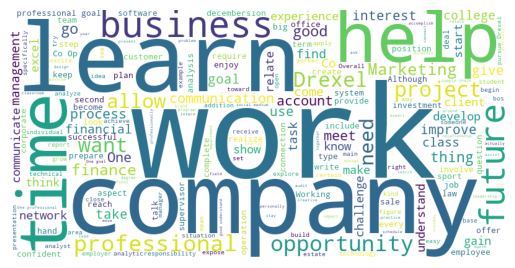

In [70]:
from wordcloud import WordCloud
str_cleaned_tokens = " ".join(Goal_string_tokens) # the word cloud needs raw text as argument not list
wc = WordCloud(background_color="white", width= 800, height= 400).generate(str_cleaned_tokens)
plt.imshow(wc)
plt.axis("off");


In [71]:
def basic_clean(text):
  #A simple function to clean up the data. All the word that are not designated as a stop word is then lemmatized after encoding and basic regex parsing are performed.
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]



Text(0.5, 0, 'No. of Occurances')

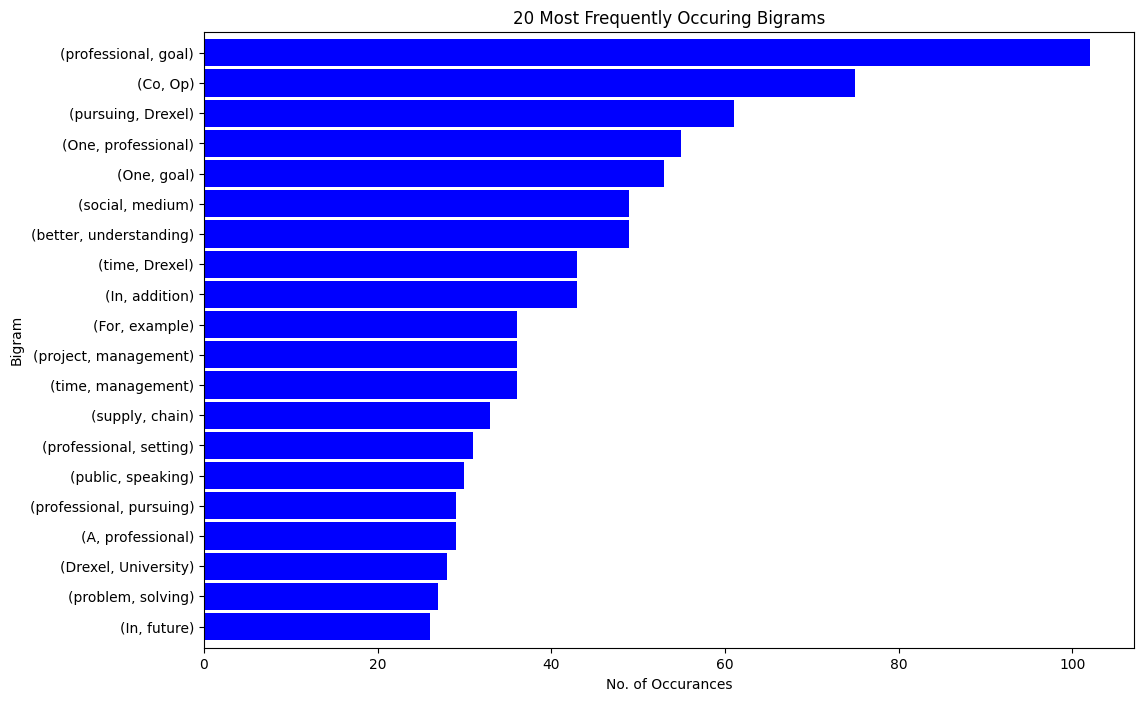

In [72]:
true_word = basic_clean(''.join(str(Data_Goals['My_Goals'].tolist())))
true_bigrams_series = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]
true_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# Generate own list of words to be ignored
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('No. of Occurances') 

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


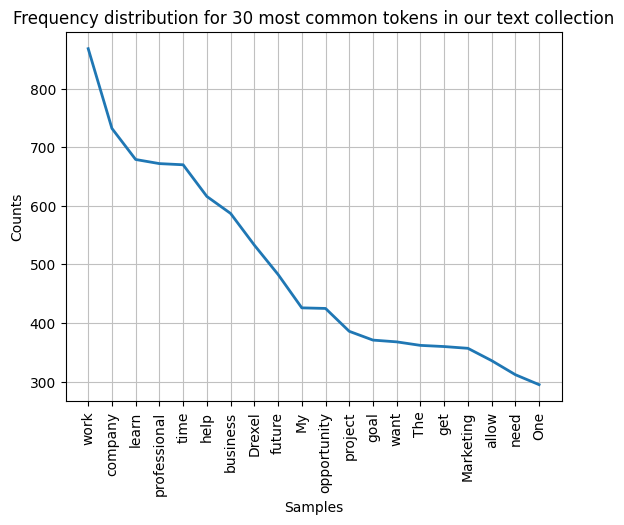

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [74]:
from nltk.text import FreqDist
nltk.download('stopwords')
from nltk.corpus import stopwords
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_text = [w for w in Goal_string_tokens if not w in remove_these]
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(20,title='Frequency distribution for 30 most common tokens in our text collection')

In [75]:
#filtered the data as per first Co-op
Data_filter1= Data_Goals.loc[Data_Goals['Co-op'] == 'First']
Data_filter1

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
16,89,Fall/Winter,B,ACCT,5COP,JR,Domestic,First,I was able to complete my second co-op as an a...,second accounting intern estate company Philad...
32,108,Fall/Winter,B,FIN,5COP,SO,Domestic,First,It helped me develop communication skills that...,It helped develop communication could future i...
45,128,Fall/Winter,B,BSAN,5COP,SR,Domestic,First,One of my professional goals is to have a dive...,One professional goals diverse analytics learn...
47,132,Fall/Winter,B,GBUS,5COP,SR,Domestic,First,"Throughout my time at Drexel, I experienced mu...",Throughout time Drexel experienced uncertainty...
103,2599,Spring/Summer,B,FIN,4COP,SR,Domestic,First,One aspect of how this co-op experience relate...,One Fuwa owned family It family business decem...
...,...,...,...,...,...,...,...,...,...,...
1378,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,This was my very first experience working at a...,working professional learned professional task...
1379,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,I have always cared about making sure there ar...,cared making opportunities poor minorities One...
1380,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,One of my professional goals is to become a CP...,One professional goals CPA graduating Drexel h...
1381,5574,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,Coming into my co-op I wasn't sure what I want...,Coming wanted future Whether accounting financ...


In [76]:
Data_filter1['My_Goals']
Data_filter1['My_Goals'].replace('co_op','')

16      second accounting intern estate company Philad...
32      It helped develop communication could future i...
45      One professional goals diverse analytics learn...
47      Throughout time Drexel experienced uncertainty...
103     One Fuwa owned family It family business decem...
                              ...                        
1378    working professional learned professional task...
1379    cared making opportunities poor minorities One...
1380    One professional goals CPA graduating Drexel h...
1381    Coming wanted future Whether accounting financ...
1382    office regards carrying professional saw quite...
Name: My_Goals, Length: 442, dtype: object

Text(0.5, 0, 'No. of Occurances')

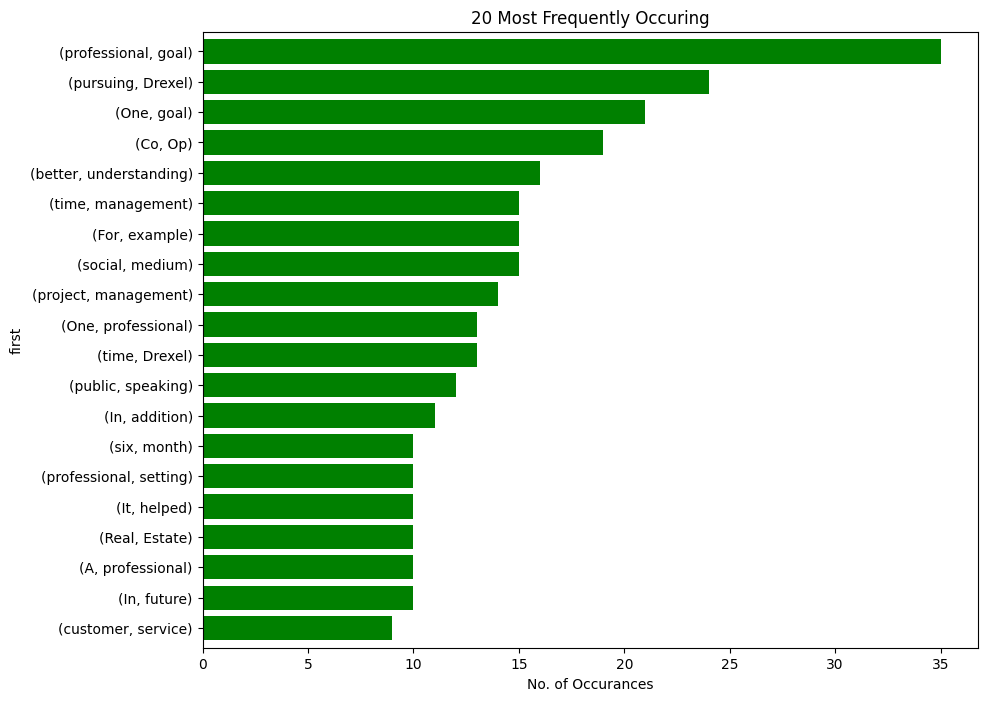

In [77]:
true_word1 = basic_clean(''.join(str(Data_filter1['My_Goals'].tolist())))
true_bigrams_series1 = (pd.Series(nltk.ngrams(true_word1, 2)).value_counts())[:20]
true_bigrams_series1.sort_values().plot.barh(color='Green', width=.8, figsize=(10, 8))
plt.title('20 Most Frequently Occuring')
plt.ylabel('first')
plt.xlabel('No. of Occurances')

In [78]:
#filtered the data as per first Co-op
Data_filter2= Data_Goals.loc[Data_Goals['Co-op'] == 'Second']
Data_filter2

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
3,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,I learned how to troubleshoot Amazon's network...,learned troubleshoot Amazon network managing n...
41,122,Fall/Winter,B,FIN,5COP,SR,Domestic,Second,This co-op has helped me better narrow my prof...,helped better narrow professional goals Prior ...
114,222,Fall/Winter,B,FIN,5COP,SR,Domestic,Second,This co-op experience helped me realize that I...,helped particularly While learned came heighte...
150,2674,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,This co-op has a heavy focus on healthcare i w...,heavy healthcare wanted insurance interested i...
163,2702,Spring/Summer,B,SMT,5COP,JR,Domestic,Second,I cannot answer this question.,answer question
...,...,...,...,...,...,...,...,...,...,...
1190,5864,Spring/Summer,B,SPBS,5COP,JR,Domestic,Second,It definitely made me more personable and unde...,It personable understanding It allowed story u...
1299,5329,Spring/Summer,B,LGST,5COP,JR,Domestic,Second,"When I came to Drexel, my goal was to work in ...",When came Drexel Corporate Comcast business ad...
1337,5452,Spring/Summer,B,ACCT,5COP,SR,Domestic,Second,This co-op helped me to take a large step forw...,helped step forward ultimate working top firms...
1345,5479,Spring/Summer,B,FIN,5COP,JR,Domestic,Second,I think the main way this co-op improved my bu...,main improved business verbal written communic...


In [79]:
Data_filter2['My_Goals']

3       learned troubleshoot Amazon network managing n...
41      helped better narrow professional goals Prior ...
114     helped particularly While learned came heighte...
150     heavy healthcare wanted insurance interested i...
163                                       answer question
                              ...                        
1190    It personable understanding It allowed story u...
1299    When came Drexel Corporate Comcast business ad...
1337    helped step forward ultimate working top firms...
1345    main improved business verbal written communic...
1349    wanted explore aspects accounting mean transfe...
Name: My_Goals, Length: 370, dtype: object

Text(0.5, 0, 'No. of Occurances')

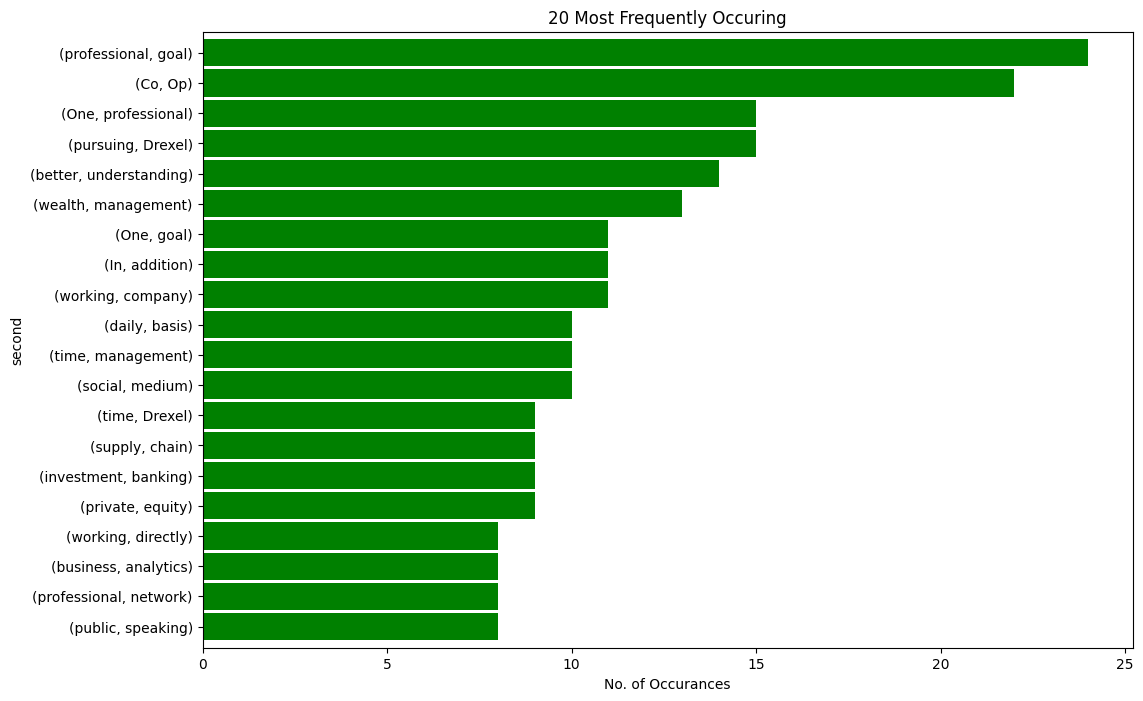

In [80]:
true_word2 = basic_clean(''.join(str(Data_filter2['My_Goals'].tolist())))
true_bigrams_series2 = (pd.Series(nltk.ngrams(true_word2, 2)).value_counts())[:20]
true_bigrams_series2.sort_values().plot.barh(color='Green', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring')
plt.ylabel('second')
plt.xlabel('No. of Occurances')

In [82]:
#filtered the data as per first Co-op
Data_filter3= Data_Goals.loc[Data_Goals['Co-op'] == 'Third']
Data_filter3

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals


In [83]:
#filtered the data as per first Co-op
Data_filter4= Data_Goals.loc[Data_Goals['Co-op'] == 'Only']
Data_filter4

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
35,2443,Spring/Summer,B,MKTG,4COP,SR,Domestic,Only,This co-op at Geico allowed me to reach a pers...,Geico allowed reach pursuing Drexel confident ...
55,2478,Spring/Summer,B,FIN,5COP,SR,International,Only,"After the 6-month co-op, I have learned a lot ...",After learned special The sociality campus une...
85,2556,Spring/Summer,B,REMD,4COP,SR,Domestic,Only,One aspect of this co-op experience that relat...,One professional Drexel working estate finance...
109,213,Fall/Winter,B,SPBS,5COP,JR,Domestic,Only,"This coop was very interesting, but something ...",interesting involve enjoyed working load satis...
132,2650,Spring/Summer,B,MKTG,5COP,SR,Domestic,Only,The only true positive I could find with this ...,The true positive could Co Op relation network...
...,...,...,...,...,...,...,...,...,...,...
1367,5526,Spring/Summer,B,OSCM,4COP,SR,Domestic,Only,Many important lessons are learned for my futu...,Many lessons learned future In opportunity Fai...
1368,5530,Spring/Summer,BE,ECON,5COP,JR,Domestic,Only,One goal I had entering this COOP cycle was to...,One entering COOP cycle develop deeper underst...
1369,2136,Fall/Winter,B,BSAN,4COP,JR,Domestic,Only,An aspect of this Co-Op experience that relate...,Co Op related professional pursuing Drexel For...
1370,2137,Fall/Winter,B,ACCT,4COP,SR,Domestic,Only,My coop at KPMG was the perfect fit for my per...,My KPMG perfect fit professional goals undecem...


In [84]:
Data_filter4['My_Goals']


35      Geico allowed reach pursuing Drexel confident ...
55      After learned special The sociality campus une...
85      One professional Drexel working estate finance...
109     interesting involve enjoyed working load satis...
132     The true positive could Co Op relation network...
                              ...                        
1367    Many lessons learned future In opportunity Fai...
1368    One entering COOP cycle develop deeper underst...
1369    Co Op related professional pursuing Drexel For...
1370    My KPMG perfect fit professional goals undecem...
1371    believed Finance sought shown logistics behind...
Name: My_Goals, Length: 131, dtype: object

Text(0.5, 0, 'No. of Occurances')

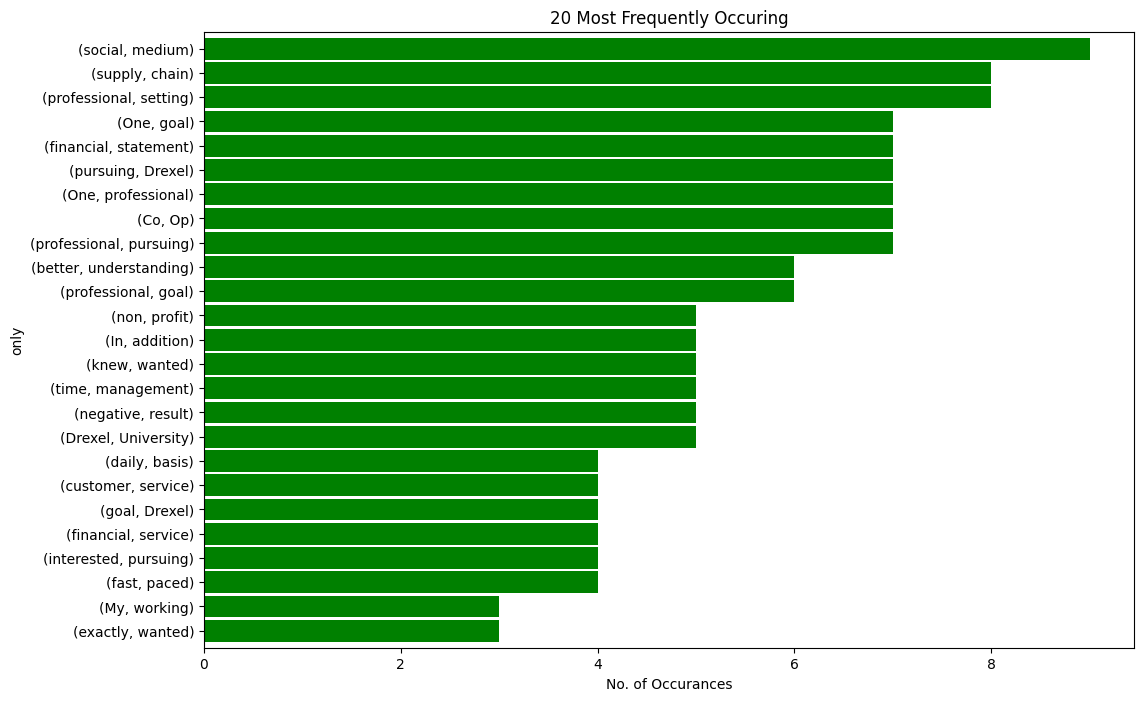

In [85]:
true_word4 = basic_clean(''.join(str(Data_filter4['My_Goals'].tolist())))
true_bigrams_series4 = (pd.Series(nltk.ngrams(true_word4, 2)).value_counts())[:25]
true_bigrams_series4.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring')
plt.ylabel('only')
plt.xlabel('No. of Occurances')